## A1, Question 1: Manually implement backpropogation for the specified network
Implement the manual backpropogation algorithm for the specified network in Q1.

In [1]:
import random
import math

K = 2
# Randomly generate the test data, A, B, C, and x]
random.seed(1) # can be optionally applied for reproducing the results in Table 2
A = [[random.uniform(-1, 1) for _ in range(K)] for _ in range(K)]
B = [[random.uniform(-1, 1) for _ in range(K)] for _ in range(K)]
C = [[random.uniform(-1, 1) for _ in range(K)] for _ in range(K)]
x = [random.uniform(-1, 1) for _ in range(K)]

In [2]:
# Define the sigmoid function
def sigmoid(value):
    return math.exp(value) / (1 + math.exp(value))

def sigmoid_derivative(value):
    return sigmoid(value) * (1 - sigmoid(value))

def matrix_vector_multiplication(matrix, vector):
    if len(matrix) != len(matrix[0]) or len(matrix) != len(vector):
        raise ValueError("Matrix and vector dimensions don't match for multiplication")

    result = [0] * len(vector)
    for i in range(len(matrix)):
        for j in range(len(vector)):
            result[i] += matrix[i][j] * vector[j]

    return result

def outer_product_manual(arr1, arr2):
    # Ensure arr1 and arr2 have the same length
    if len(arr1) != len(arr2):
        raise ValueError("Input arrays must have the same length.")

    outer_result = []
    for i in range(len(arr1)):
        row = [arr1[i] * val for val in arr2]
        outer_result.append(row)

    return outer_result

def matrix_vector_dot_product_manual(matrix, vector):
    # Ensure the matrix has the correct shape (k x k) and the vector has length k
    k = len(vector)
    if len(matrix) != k or len(matrix[0]) != k:
        raise ValueError("Matrix dimensions must be k x k, and the vector must have length k.")

    result = [sum(matrix[i][j] * vector[i] for i in range(k)) for j in range(k)]
    return result

def vector_elementwise_multiply_manual(vector1, vector2):
    # Ensure both vectors have the same length (k)
    k = len(vector1)
    if len(vector2) != k:
        raise ValueError("Both vectors must have the same length (k).")

    result = [vector1[i] * vector2[i] for i in range(k)]
    return result

# Manual Backpropagation
def manual_backpropagation(x, A, B, C):
    K = len(x)
    
    # Initialze all other vectors to zero, of length K
    y, u, v, w = [0] * K, [0] * K, [0] * K, [0] * K

    # Forward propagation
    y = matrix_vector_multiplication(A, x)
    for i in range(K):
        u[i] = sigmoid(y[i])
    v = matrix_vector_multiplication(B, x)
    z = [u + v for u, v in zip(u, v)]
    w = matrix_vector_multiplication(C, z)

    L = sum(val ** 2 for val in w)

    #Backpropagation
    #Compute gradients ∂L/∂A, ∂L/∂B, ∂L/∂C
    dL_dw = [round(2 * val, 4) for val in w]
    dL_dz = matrix_vector_dot_product_manual(C, dL_dw)

    #Compute gradient ∂L/∂A
    y_prime = []
    for i in range(K):
        y_prime.append(sigmoid_derivative(y[i]))

    dL_dy = vector_elementwise_multiply_manual(dL_dz, y_prime)
    dL_dA = outer_product_manual(dL_dy, x)

    #Compute gradient ∂L/∂b
    dL_dv = dL_dz # dz_dv = 1
    dL_dB = outer_product_manual(dL_dv, x)

    #Compute gradient ∂L/∂C
    dL_dC = outer_product_manual(dL_dw, z)

    return dL_dA, dL_dB, dL_dC, L


# Manual Backpropagation
dL_dA, dL_dB, dL_dC, loss = manual_backpropagation(x, A, B, C)

print(f"Manual Backpropagation Loss: {loss}")
print("Manual Backpropagation Gradient ∂L/∂A:")
print(dL_dA)
print("Manual Backpropagation Gradient ∂L/∂B:")
print(dL_dB)
print("Manual Backpropagation Gradient ∂L/∂C:")
print(dL_dC)

Manual Backpropagation Loss: 0.3266870111030815
Manual Backpropagation Gradient ∂L/∂A:
[[0.11321055651329072, -0.2149109084322412], [0.10881780687808922, -0.20657202340515696]]
Manual Backpropagation Gradient ∂L/∂B:
[[0.596923039444085, -1.1331564530910363], [0.5020349921706699, -0.9530276994928943]]
Manual Backpropagation Gradient ∂L/∂C:
[[-0.37515590272795146, -0.2853794457697634], [0.13957172188478764, 0.10617159518744418]]


## Program to find the argmin for A,B,C using GD
This next section will be a program that computes the argmin for A,B,C using gradient descent for any x1, x2, . . . , xN in R^K

First Loss, Learning Rate 0.01, Value: 19.196544859230865
Last Loss, Learning Rate 0.01, Value: 0.00463069920909323


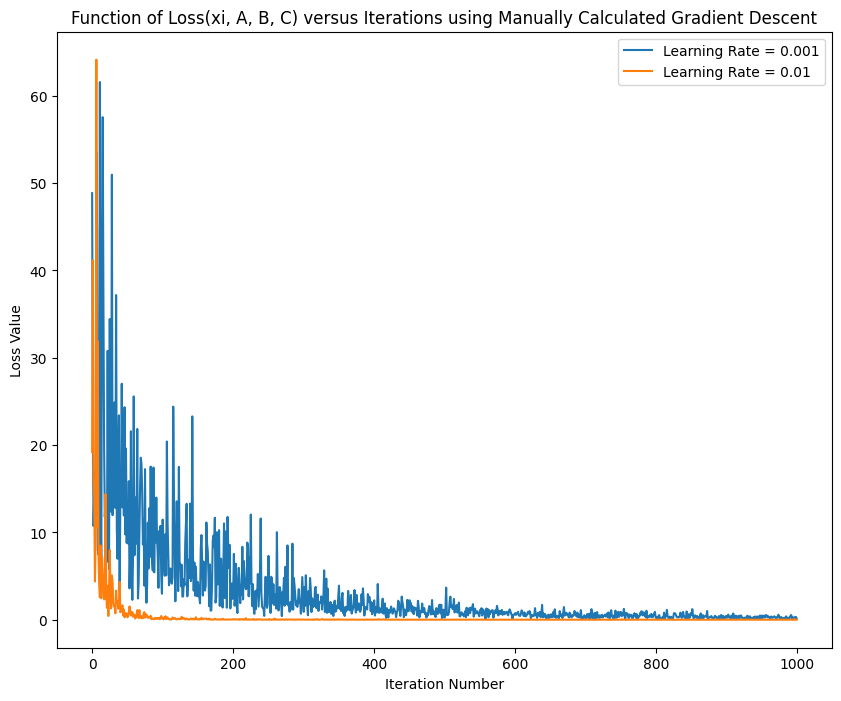

In [3]:
import matplotlib.pyplot as plt

def elementwise_scalar_matrix_multiplication_manual(scalar, matrix):
  # Get the dimensions of the matrix (rows and columns)
    rows, columns = len(matrix), len(matrix[0])

    # Perform element-wise multiplication with the scalar
    result = [[scalar * matrix[i][j] for j in range(columns)] for i in range(rows)]

    return result

def elementwise_matrix_addition_manual(matrix1, matrix2):
    # Ensure both matrices have the same dimensions
    if len(matrix1) != len(matrix2) or len(matrix1[0]) != len(matrix2[0]):
        raise ValueError("Both matrices must have the same dimensions.")

    rows, columns = len(matrix1), len(matrix1[0])
    result = [[matrix1[i][j] + matrix2[i][j] for j in range(columns)] for i in range(rows)]

    return result

def arg_min_function(N_value, K_value, learning_rate = 0.01):
  """
  :param N: Number of iterations
  :param K: Number of dimensions for the matrix A, B, C
  """
  loss_over_iterations = []

  A_arg = [[random.uniform(-1, 1) for _ in range(K_value)] for _ in range(K_value)]
  B_arg = [[random.uniform(-1, 1) for _ in range(K_value)] for _ in range(K_value)]
  C_arg = [[random.uniform(-1, 1) for _ in range(K_value)] for _ in range(K_value)]
  x_to_iterate = [[random.uniform(-1, 1) for _ in range(K_value)] for _ in range(N_value)]

  for i in range(N_value):
    grad_A, grad_B, grad_C, loss = manual_backpropagation(x_to_iterate[i], A_arg, B_arg, C_arg)
    loss_over_iterations.append(loss)

    # Update weights for A
    grad_A_scaled = elementwise_scalar_matrix_multiplication_manual(-learning_rate, grad_A)
    A_arg = elementwise_matrix_addition_manual(A_arg, grad_A_scaled)
    # Update weights for B
    grad_B_scaled = elementwise_scalar_matrix_multiplication_manual(-learning_rate, grad_B)
    B_arg = elementwise_matrix_addition_manual(B_arg, grad_B_scaled)
    # Update weights for C
    grad_C_scaled = elementwise_scalar_matrix_multiplication_manual(-learning_rate, grad_C)
    C_arg = elementwise_matrix_addition_manual(C_arg, grad_C_scaled)

  return loss_over_iterations

# Find the arg min of the loss function. Use N datapoints of x, with dimension K
N_arg = 1000
K_arg = 8
loss_over_iterations_001 = arg_min_function(N_arg, K_arg, learning_rate=0.01)
loss_over_iterations_0001 = arg_min_function(N_arg, K_arg, learning_rate=0.001)

print(f"First Loss, Learning Rate 0.01, Value: {loss_over_iterations_001[0]}")
print(f"Last Loss, Learning Rate 0.01, Value: {loss_over_iterations_001[-1]}")

plt.figure(figsize=(10, 8))
plt.plot(range(N_arg), loss_over_iterations_0001, label=f"Learning Rate = 0.001")
plt.plot(range(N_arg), loss_over_iterations_001, label=f"Learning Rate = 0.01")
plt.title(f"Function of Loss(xi, A, B, C) versus Iterations using Manually Calculated Gradient Descent")
plt.xlabel("Iteration Number")
plt.ylabel("Loss Value")
plt.legend()
plt.show()


## Verify the gradients using libraries - Torch, mxnet
The following 2 code sections verify the gradients using both torch and mxnet on the same input A, B, C, x that was generated above.

In [4]:
import torch

A_torch = torch.tensor(A, requires_grad=True, dtype=torch.float32)
B_torch = torch.tensor(B, requires_grad=True, dtype=torch.float32)
C_torch = torch.tensor(C, requires_grad=True, dtype=torch.float32)
x_torch = torch.tensor(x, dtype=torch.float32)

# Define the sigmoid function
def sigmoid(value):
    return 1 / (1 + torch.exp(-value))

def forwardpropagation_torch(x, A, B, C):
    y = torch.matmul(A, x.unsqueeze(1)).squeeze()
    u = sigmoid(y)
    v = torch.matmul(B, x.unsqueeze(1)).squeeze()
    z = u + v
    w = torch.matmul(C, z.unsqueeze(1)).squeeze()
    L = torch.norm(w, p=2)**2
    return L

def backwardpropagation_torch(L_torch):
    L_torch.backward()
    dA = A_torch.grad
    dB = B_torch.grad
    dC = C_torch.grad
    return dA, dB, dC

L_torch = forwardpropagation_torch(x_torch, A_torch, B_torch, C_torch)
print(f"Loss (torch): {L_torch}")
dA_torch, dB_torch, dC_torch = backwardpropagation_torch(L_torch)


print(f"Gradients (torch) dL/dA:\n{dA_torch}")
print(f"Gradients (torch) dL/dB:\n{dB_torch}")
print(f"Gradients (torch) dL/dC:\n{dC_torch}")

Loss (torch): 0.3266870081424713
Gradients (torch) dL/dA:
tensor([[ 0.1132, -0.2149],
        [ 0.1088, -0.2066]])
Gradients (torch) dL/dB:
tensor([[ 0.5969, -1.1332],
        [ 0.5020, -0.9530]])
Gradients (torch) dL/dC:
tensor([[-0.3751, -0.2854],
        [ 0.1396,  0.1062]])


## More samples for calculating gradients - with mxnet
The numpy version is not compatible with tensorflow, so it was not included in the report -- but it does also match.

In [5]:
# import numpy as np
# import mxnet as mx
# from mxnet import autograd

# x_mx = mx.nd.array(x_torch.detach().numpy())
# A_mx = mx.nd.array(A_torch.detach().numpy())
# B_mx = mx.nd.array(B_torch.detach().numpy())
# C_mx = mx.nd.array(C_torch.detach().numpy())

# def sigmoid(value):
#     return 1 / (1 + mx.nd.exp(-value))

# def forwardpropagation_mx(x, A, B, C):
#     y = mx.nd.dot(A, x)
#     u = sigmoid(y)
#     v = mx.nd.dot(B, x)
#     z = u + v
#     w = mx.nd.dot(C, z)
#     L = mx.nd.norm(w) ** 2
#     return L

# def backwardpropagation_mx(L_mx):
#     L_mx.backward()
#     dA = A_mx.grad
#     dB = B_mx.grad
#     dC = C_mx.grad
#     return dA, dB, dC

# A_mx.attach_grad()
# B_mx.attach_grad()
# C_mx.attach_grad()

# with autograd.record():
#     L_mx = forwardpropagation_mx(x_mx, A_mx, B_mx, C_mx)
#     print(f"Loss (mx): {L_mx}")

# dA_mx, dB_mx, dC_mx = backwardpropagation_mx(L_mx)

# print(f"Gradients (mx) dL/dA:\n{dA_mx}")
# print(f"Gradients (mx) dL/dB:\n{dB_mx}")
# print(f"Gradients (mx) dL/dC:\n{dC_mx}")
